<a href="https://colab.research.google.com/github/Sanyam8055/100-Days-of-ML/blob/master/SVM_SGD_basic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn import svm
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [3]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
df = df[df.Target < 5]

In [86]:
X = df.MedInc
y = df.Target
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 19648, dtype: float64


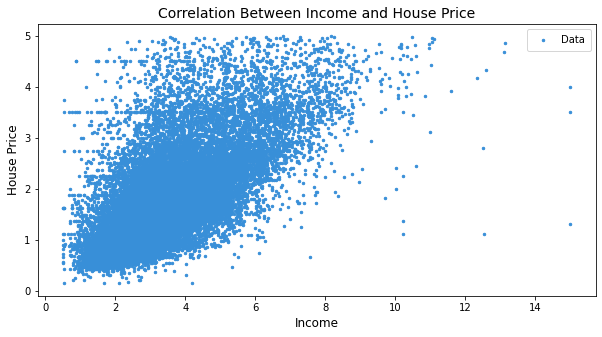

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1): 
    m, b = 0.1, 0.1 
    mse = [] 
    N = len(X) 
    
    for _ in range(epochs):
                
        f = y - (m*X + b)
    

        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

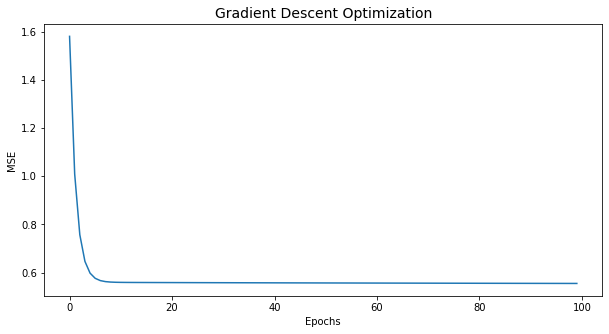

In [9]:
y_pred = m*X + b
plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

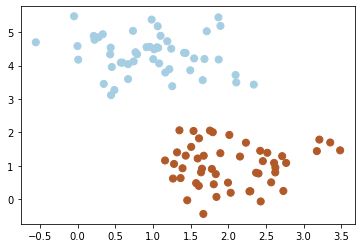

In [113]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

In [0]:
w = svm.SVC(kernel='linear', C=1000,gamma='auto').fit(X, y)

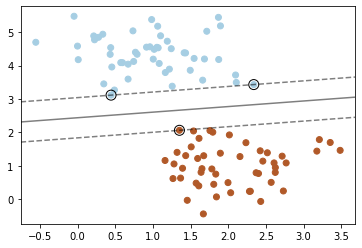

In [119]:
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# # plot the decision function
 ax = plt.gca()
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()

# # create grid to evaluate model
 xx = np.linspace(xlim[0], xlim[1], 10)
 yy = np.linspace(ylim[0], ylim[1], 10)

 YY, XX = np.meshgrid(yy, xx)

 xy = np.vstack([XX.ravel(), YY.ravel()]).T

# #decision_function(self, X) evaluates the decision function for the samples in X.
 Z = w.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
 ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
# # plot support vectors
 ax.scatter(w.support_vectors_[:, 0], w.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
 plt.show()

In [120]:
w.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])